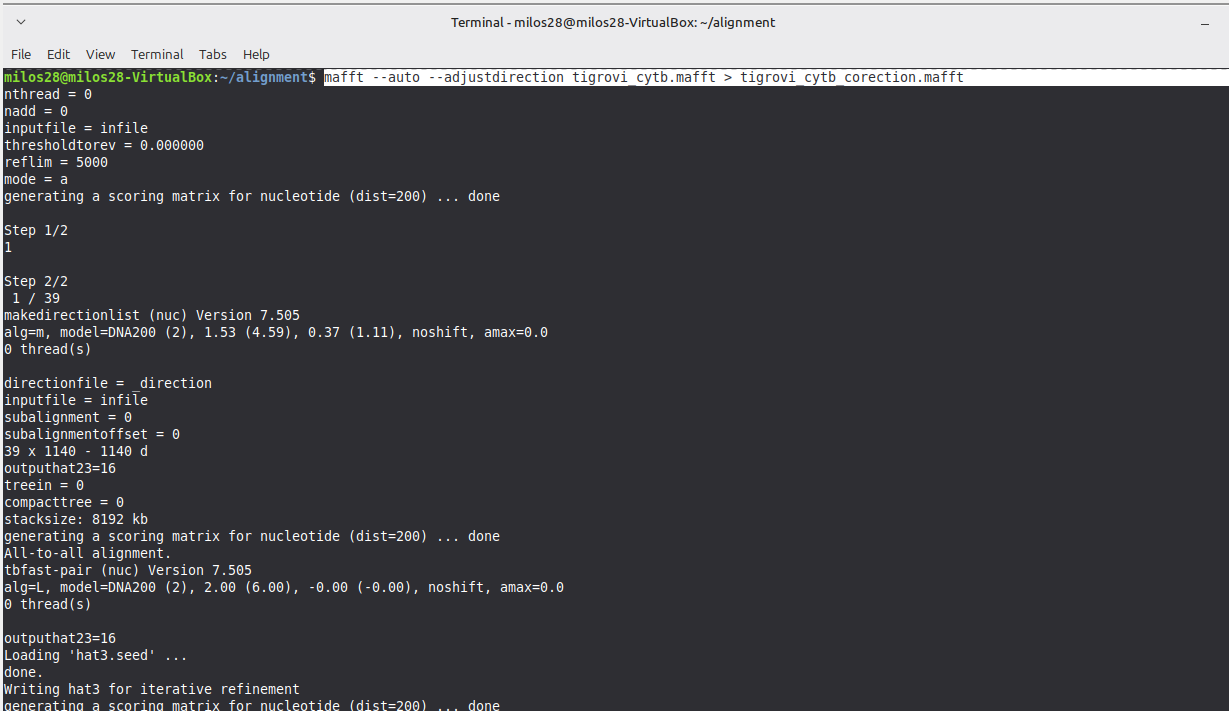

In [ ]:
pip install biopython


In [ ]:
from Bio import SeqIO
from google.colab import files
from Bio import AlignIO


In [ ]:
uploaded = files.upload()


Saving tigrovi_cytb_corection.mafft to tigrovi_cytb_corection.mafft


In [ ]:
for filename in uploaded.keys():
    with open(filename, "wb") as f:
        f.write(uploaded[filename])
    print(f"{filename} je sačuvan na Colab disk")

tigrovi_cytb_corection.mafft je sačuvan na Colab disk


In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq

fasta_file = "tigrovi_cytb_corection.mafft"

ref_seq = None
reversed_found = False

for record in SeqIO.parse(fasta_file, "fasta"):
    if ref_seq is None:
        ref_seq = str(record.seq).replace("-", "")
        continue

    seq_nogaps = str(record.seq).replace("-", "")
    identity_forward = sum(a == b for a, b in zip(ref_seq, seq_nogaps))
    rc = str(Seq(seq_nogaps).reverse_complement())
    identity_reverse = sum(a == b for a, b in zip(ref_seq, rc))

    if identity_reverse > identity_forward:
        print(record.id, "→ reverzni smer detektovan!")
        reversed_found = True

if not reversed_found:
    print(" Sve sekvence su u ispravnom smeru!")



 Sve sekvence su u ispravnom smeru!
